In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit

In [4]:
model_id = 'vai_nat_model'
#model_id = "Reduced_model"
x_labels = pd.read_csv(model_id+'_x_names.csv').x.to_list()
chains   = pd.read_csv(f'{model_id}_chains.csv')
summ     = pd.read_csv(model_id+'_summary.csv') 
df       = pd.read_csv('processed_data_3.csv')
df       = df[df['iso_code'] != 'OWID_WRL']

<IPython.core.display.Javascript object>


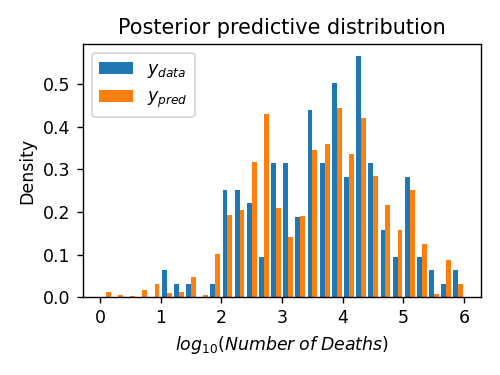

In [16]:
yreps = [chains[col].values for col in chains.columns if 'y_rep' in col]
yreps = np.concatenate(yreps)
Ypred = np.log10(yreps[yreps>0])
Y = np.log10(df['new_deaths'][df['new_deaths']>0])

plt.figure(figsize=(4,3))
plt.hist([Y,Ypred],density=True,bins=30,label=['$y_{data}$','$y_{pred}$'])
plt.legend(loc=2)
plt.xlabel('$log_{10}(Number \; of \; Deaths)$')
plt.ylabel('Density')
plt.title('Posterior predictive distribution')
plt.tight_layout()
plt.savefig('posterior_predictive_check_model_'+model_id+'.png',dpi=120)

In [17]:
yreps_idh = []
for i in range(1,4):
    yrep_cols = [col for col in chains.columns if 'y_rep' in col]
    yreps = chains[yrep_cols].T.reset_index(drop=True)
    cond = df['group_idh'] == i
    yrep_idh = yreps.loc[cond.values].values
    yrep_idh = np.matrix.flatten(yrep_idh)
    yreps_idh.append(np.log10(yrep_idh[yrep_idh>0]))


<IPython.core.display.Javascript object>


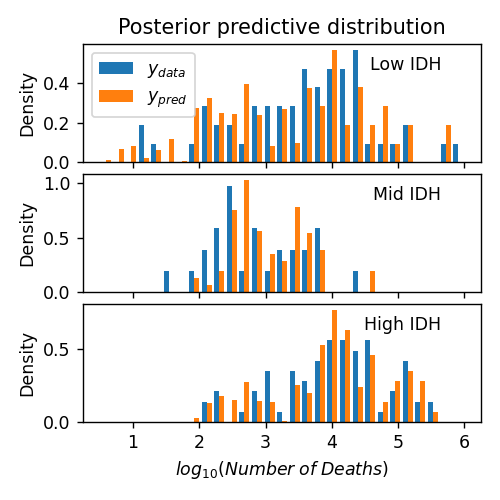

In [18]:
Y = np.log10(df['new_deaths'][df['new_deaths']>0])
group_labels= ['Low IDH','Mid IDH','High IDH']
fig,ax= plt.subplots(3,1,figsize=(4,4),sharex=True)
for i in range(3):
    Ygroup = Y[df['group_idh'] == i+1]
    ax[i].hist([Ygroup,yreps_idh[i]],density=True,
               bins=np.linspace(0.5,6,30),
                label=['$y_{data}$','$y_{pred}$'])
    ax[i].text(0.9,0.9,group_labels[i],
               transform=ax[i].transAxes,
               va = 'top', ha= 'right')
ax[0].legend(loc=2)
plt.xlabel('$log_{10}(Number \; of \; Deaths)$')
for x in ax: x.set_ylabel('Density')
ax[0].set_title('Posterior predictive distribution')
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('posterior_predictive_group_check_model_'+model_id+'.png',dpi=120)

<IPython.core.display.Javascript object>


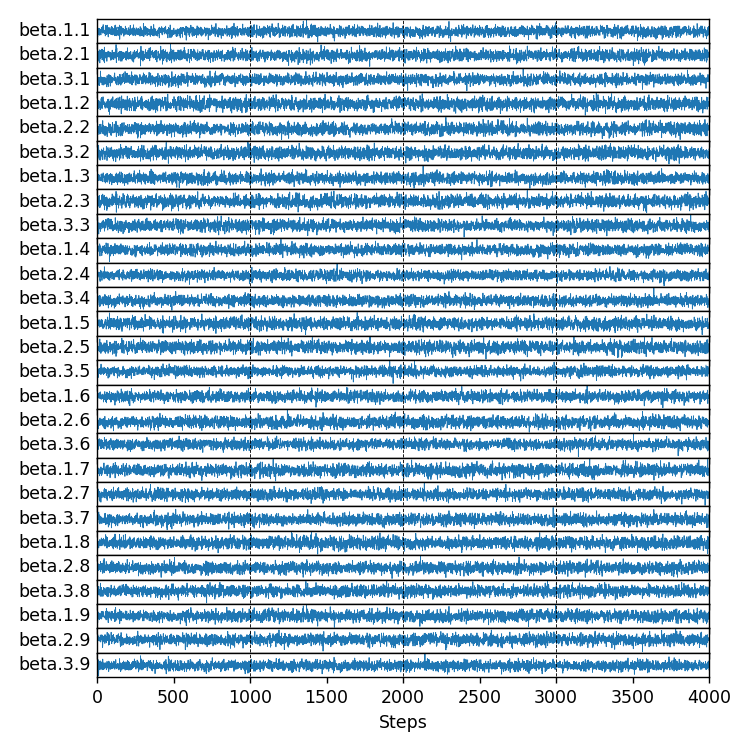

In [19]:
beta_n = len(x_labels)*3

fig,axs = plt.subplots(beta_n,1,figsize=(6,6),sharex=True)
for i,c in enumerate(chains.columns[:beta_n]):
    axs[i].plot(chains[c],label =c,lw=0.5)
    for j in range(1,4):
        axs[i].plot(np.array([1e3]*2)*j,[min(chains[c]),max(chains[c])],
                   lw=0.5,ls='--',color='k')
    axs[i].text(-0.01,0.5,c,transform=axs[i].transAxes,
                va='center',ha='right')
    axs[i].set_yticks([])
axs[-1].set_xlabel('Steps')
axs[-1].set_xlim(0,4000)
plt.tight_layout()
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('chains_beta_values_model_'+model_id+'.png',dpi=120)

<IPython.core.display.Javascript object>


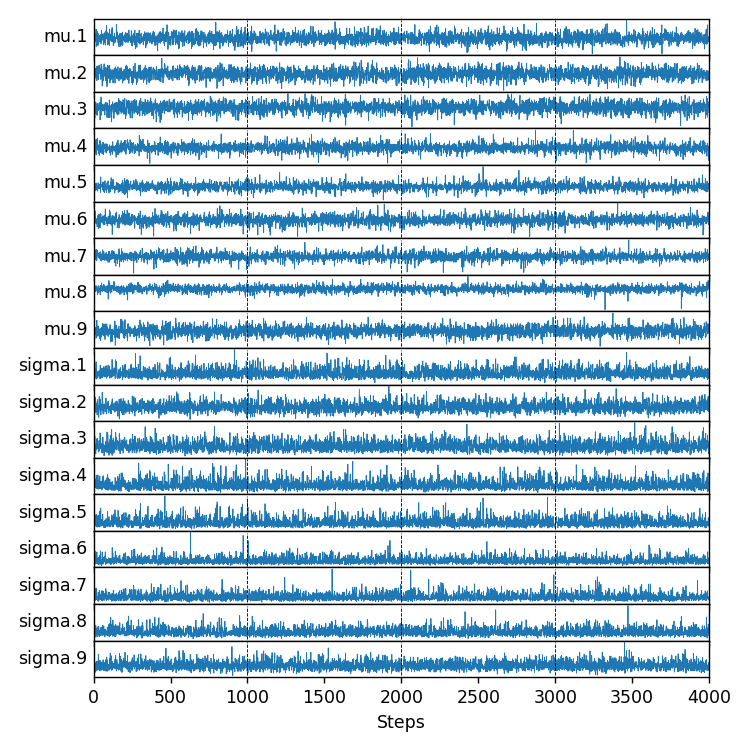

In [20]:
fig,axs = plt.subplots(int(beta_n*2/3),1,figsize=(6,6),sharex=True)
for i,c in enumerate(chains.columns[beta_n:beta_n+int(beta_n*2/3)]):
    axs[i].plot(chains[c],label =c,lw=0.5)
    for j in range(1,4):
        axs[i].plot(np.array([1e3]*2)*j,[min(chains[c]),max(chains[c])],
                   lw=0.5,ls='--',color='k')
    axs[i].text(-0.01,0.5,c,transform=axs[i].transAxes,
                va='center',ha='right')
    axs[i].set_yticks([])
axs[-1].set_xlabel('Steps')
axs[-1].set_xlim(0,4000)
plt.tight_layout()
plt.subplots_adjust(wspace=0,hspace=0)
plt.savefig('chains_hyper_values_model_'+model_id+'.png',dpi=120)

In [21]:
summ

,Unnamed: 0,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,mu[1],-5.865073e+00,0.011168,0.647239,-7.101850e+00,-6.277299e+00,-5.874420e+00,-5.451773e+00,-4.550336e+00,3358.922509,1.000077
1,mu[2],1.065767e+01,0.047696,3.290174,3.845739e+00,8.470386e+00,1.072087e+01,1.286858e+01,1.700320e+01,4758.486208,0.999916
2,mu[3],7.465130e-01,0.012403,0.758237,-8.573203e-01,2.912336e-01,7.452151e-01,1.230901e+00,2.241542e+00,3737.055566,1.000160
3,mu[4],3.016900e-01,0.005580,0.308806,-3.052702e-01,1.168961e-01,3.027874e-01,4.786496e-01,9.374130e-01,3062.222930,1.001090
4,mu[5],-3.931285e-01,0.005204,0.259469,-9.047779e-01,-5.454331e-01,-3.969669e-01,-2.458042e-01,1.486530e-01,2486.085158,1.000393
...,...,...,...,...,...,...,...,...,...,...,...
201,y_rep[157],3.473662e+03,1.119917,71.582685,3.333975e+03,3.425000e+03,3.473000e+03,3.523000e+03,3.614000e+03,4085.494420,1.000169
202,y_rep[158],2.242103e+04,2.692867,171.655866,2.208200e+04,2.230375e+04,2.242300e+04,2.253600e+04,2.277003e+04,4063.379958,1.000216
203,y_rep[159],1.125535e+04,1.871535,116.690222,1.103000e+04,1.117700e+04,1.125300e+04,1.133500e+04,1.148202e+04,3887.524630,1.001281
204,y_rep[160],3.797037e+03,1.227456,77.934470,3.645975e+03,3.745000e+03,3.796000e+03,3.848000e+03,3.952000e+03,4031.317179,1.000261


<IPython.core.display.Javascript object>


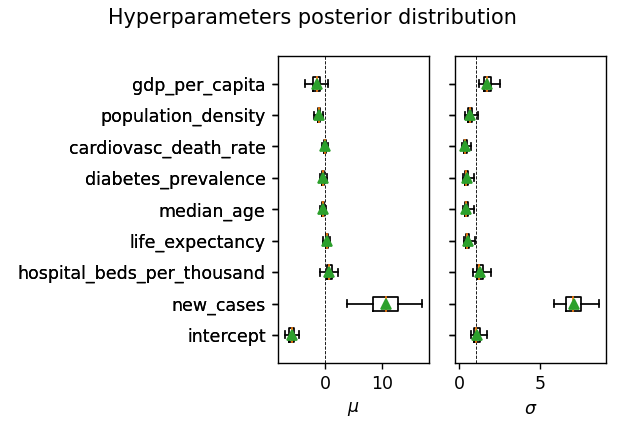

In [25]:
xlen = len(x_labels)
pos = np.linspace(0,xlen,xlen)

mu_vals = []
nx = len(x_labels)
for i in range(0,xlen):
    bxpval = dict(label  = x_labels[i],
                  mean   = summ['mean'][i],
                  whislo = summ['2.5%'][i],
                  q1     = summ['25%'][i],
                  med    = summ['50%'][i],
                  q3     = summ['75%'][i], 
                  whishi = summ['97.5%'][i],
                   )
    mu_vals.append(bxpval)
sig_vals = []
for i in range(xlen,xlen*2):
    bxpval = dict(label  = x_labels[i-len(x_labels)],
                  mean   = summ['mean'][i],
                  whislo = summ['2.5%'][i],
                  q1     = summ['25%'][i],
                  med    = summ['50%'][i],
                  q3     = summ['75%'][i], 
                  whishi = summ['97.5%'][i],
                   )
    sig_vals.append(bxpval)

fig,axs = plt.subplots(1,2,figsize=(5,3.5),sharey=True)
axs[0].bxp(mu_vals,positions=pos, showmeans=True, showfliers=False,vert=False)
axs[0].set_xlabel('$\mu$')
axs[0].plot([0,0],[min(pos)-1,max(pos)+1],lw=0.5,color='k',linestyle='--')
axs[1].bxp(sig_vals,positions=pos, showmeans=True, showfliers=False,vert=False)
axs[1].plot([1,1],[min(pos)-1,max(pos)+1],lw=0.5,color='k',linestyle='--')
axs[1].set_xlabel('$\sigma$')
for ax in axs: ax.set_ylim(min(pos)-1,max(pos)+1)
fig.suptitle('Hyperparameters posterior distribution')
plt.tight_layout()
plt.savefig('hyperparameters_model_'+model_id+'.png',dpi=120)

In [26]:
summ

,Unnamed: 0,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,mu[1],-5.865073e+00,0.011168,0.647239,-7.101850e+00,-6.277299e+00,-5.874420e+00,-5.451773e+00,-4.550336e+00,3358.922509,1.000077
1,mu[2],1.065767e+01,0.047696,3.290174,3.845739e+00,8.470386e+00,1.072087e+01,1.286858e+01,1.700320e+01,4758.486208,0.999916
2,mu[3],7.465130e-01,0.012403,0.758237,-8.573203e-01,2.912336e-01,7.452151e-01,1.230901e+00,2.241542e+00,3737.055566,1.000160
3,mu[4],3.016900e-01,0.005580,0.308806,-3.052702e-01,1.168961e-01,3.027874e-01,4.786496e-01,9.374130e-01,3062.222930,1.001090
4,mu[5],-3.931285e-01,0.005204,0.259469,-9.047779e-01,-5.454331e-01,-3.969669e-01,-2.458042e-01,1.486530e-01,2486.085158,1.000393
...,...,...,...,...,...,...,...,...,...,...,...
201,y_rep[157],3.473662e+03,1.119917,71.582685,3.333975e+03,3.425000e+03,3.473000e+03,3.523000e+03,3.614000e+03,4085.494420,1.000169
202,y_rep[158],2.242103e+04,2.692867,171.655866,2.208200e+04,2.230375e+04,2.242300e+04,2.253600e+04,2.277003e+04,4063.379958,1.000216
203,y_rep[159],1.125535e+04,1.871535,116.690222,1.103000e+04,1.117700e+04,1.125300e+04,1.133500e+04,1.148202e+04,3887.524630,1.001281
204,y_rep[160],3.797037e+03,1.227456,77.934470,3.645975e+03,3.745000e+03,3.796000e+03,3.848000e+03,3.952000e+03,4031.317179,1.000261


In [27]:
summ

,Unnamed: 0,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
0,mu[1],-5.865073e+00,0.011168,0.647239,-7.101850e+00,-6.277299e+00,-5.874420e+00,-5.451773e+00,-4.550336e+00,3358.922509,1.000077
1,mu[2],1.065767e+01,0.047696,3.290174,3.845739e+00,8.470386e+00,1.072087e+01,1.286858e+01,1.700320e+01,4758.486208,0.999916
2,mu[3],7.465130e-01,0.012403,0.758237,-8.573203e-01,2.912336e-01,7.452151e-01,1.230901e+00,2.241542e+00,3737.055566,1.000160
3,mu[4],3.016900e-01,0.005580,0.308806,-3.052702e-01,1.168961e-01,3.027874e-01,4.786496e-01,9.374130e-01,3062.222930,1.001090
4,mu[5],-3.931285e-01,0.005204,0.259469,-9.047779e-01,-5.454331e-01,-3.969669e-01,-2.458042e-01,1.486530e-01,2486.085158,1.000393
...,...,...,...,...,...,...,...,...,...,...,...
201,y_rep[157],3.473662e+03,1.119917,71.582685,3.333975e+03,3.425000e+03,3.473000e+03,3.523000e+03,3.614000e+03,4085.494420,1.000169
202,y_rep[158],2.242103e+04,2.692867,171.655866,2.208200e+04,2.230375e+04,2.242300e+04,2.253600e+04,2.277003e+04,4063.379958,1.000216
203,y_rep[159],1.125535e+04,1.871535,116.690222,1.103000e+04,1.117700e+04,1.125300e+04,1.133500e+04,1.148202e+04,3887.524630,1.001281
204,y_rep[160],3.797037e+03,1.227456,77.934470,3.645975e+03,3.745000e+03,3.796000e+03,3.848000e+03,3.952000e+03,4031.317179,1.000261


<IPython.core.display.Javascript object>


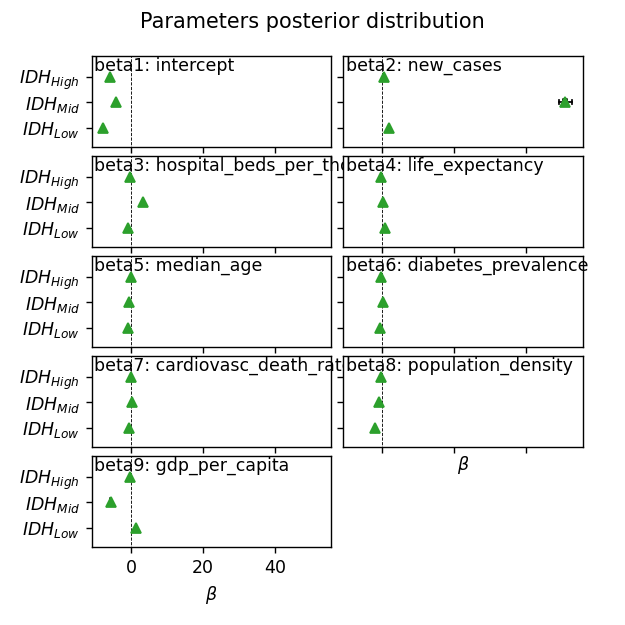

In [34]:
group_labs = ['$IDH_{Low}$','$IDH_{Mid}$','$IDH_{High}$']

idh_group_is = np.array([xlen*2,xlen*3,xlen*4])

bsummarys = []
for j in range(xlen):
    bsummary = []
    for ii,i in enumerate(idh_group_is + j):
        b = dict(mean   = summ['mean'][i],
                 whislo = summ['2.5%'][i],
                 q1     = summ['25%'][i],
                 med    = summ['50%'][i],
                 q3     = summ['75%'][i], 
                 whishi = summ['97.5%'][i])
        bsummary.append(b)
    bsummarys.append(bsummary)
pos = np.linspace(0,2,3)

fig,axs = plt.subplots(5,2,
                       figsize=(5,5),sharey=True,sharex=True)
fig.suptitle('Parameters posterior distribution')
for i,(bsummary,ax,lab) in enumerate(zip(bsummarys,axs.ravel(),x_labels)):
    ax.bxp(bsummary,pos, showmeans=True, showfliers=False,vert=False)
    ax.plot([0,0],[-1,3],lw=0.5,color='k',linestyle='--')
    ax.set_yticks(pos)
    ax.set_yticklabels(group_labs)
    beta_val = summ['Unnamed: 0'][xlen*2+i][-2]
    lab =  "beta{}".format(beta_val) + ': ' + lab
    ax.text(0.01,0.99,lab,va='top',ha='left',transform=ax.transAxes)
    ax.set_ylim(-0.75,2.8)

axs[-1,-1].axis('off')

axs[-1,0].set_xlabel(r'$\beta$')
axs[-2,1].set_xlabel(r'$\beta$')
fig.align_ylabels()
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.1)
plt.savefig('parameters_model_'+model_id+'.png',dpi=120)

# Prior Predictive Check

In [35]:
def params_category_matrix(df,params):
    nx = int(len(params)/5) # 9 parametros
    bs = []
    g_idh = df['group_idh']
    for i in range(nx): # i =0
        b  = pd.cut(g_idh,bins=[0,1.5,2.5,3.5],
                       labels=params[np.array([0,1,2])+(3*i)], 
                       include_lowest=True)
        bs.append(b.to_numpy())
    return np.vstack(bs).T

def prior_predictive_paramater_sampling(x_cols,size=1000):
    n_params = len(x_cols)
    mu  = np.random.normal(loc=0,scale=5,size=(n_params,size))
    sig = np.random.exponential(scale=5,size=(n_params,size))
    bet = [np.random.normal(loc=u,scale=s) for u,s in zip(mu,sig) for i in range(3)]
    return np.concatenate([bet,mu,sig]).T

def gen_prediction(df,q,x_names):
    x_cols =x_names.copy()
    Y = df['new_deaths'].to_numpy(dtype=int)
    xn = len(x_cols)
    x_cols.remove('intercept')
    X = df[x_cols].to_numpy()
    X = np.hstack([np.ones((X.shape[0],1)),X])
    #print(df['population'].min(),df['population'].max())
    N = df['population'].astype(int)
    #print(N.min(),N.max())
    B = params_category_matrix(df,q)
    #print(B)
    logitarg = np.sum(X * B,axis=1) # expit argument result
    T = expit(logitarg)
    Ypred = np.random.binomial(N,T)
    return Ypred,Y,N,T

In [36]:
prior_params = prior_predictive_paramater_sampling(x_labels)
prior_params.shape

(1000, 45)

<IPython.core.display.Javascript object>


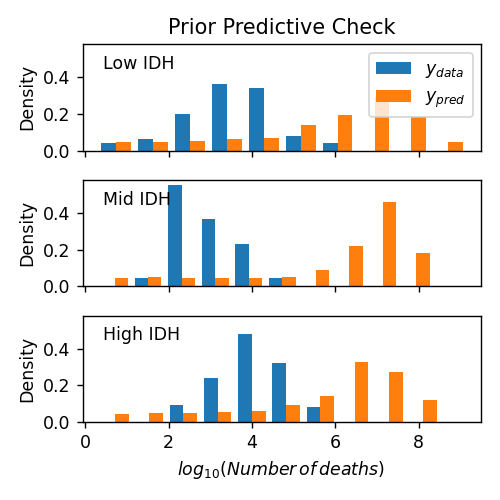

In [39]:
yls,yms,yhs = [],[],[]
for i in range(1000):
    Ypred,Y,N,T = gen_prediction(df,prior_params[i],x_labels)
    yl = Ypred[df['group_idh']==1]
    yls.append(np.log10(yl[yl>0]))
    ym = Ypred[df['group_idh']==2]
    yms.append(np.log10(ym[ym>0]))
    yh = Ypred[df['group_idh']==3]
    yhs.append(np.log10(yh[yh>0]))
Yl = np.concatenate(yls)
Ym = np.concatenate(yms)
Yh = np.concatenate(yhs)

ys = []
for i in range(1,4):
    ii = df['group_idh']==i
    Ygroup = Y[ii]
    y = np.log10(Ygroup[Ygroup>0])
    ys.append(y)

group_labels = ['Low IDH','Mid IDH','High IDH']
fig,axs = plt.subplots(3,1,figsize=(4,4),sharex=True,sharey=True)
for i,ypred in zip(range(3),[Yl,Ym,Yh]):
    axs[i].hist([ys[i],ypred[ypred>0]],label=['$y_{data}$','$y_{pred}$'],density=True)
    axs[i].text(0.05,0.9,group_labels[i],va='top',transform=axs[i].transAxes)
axs[-1].set_xlabel('$log_{10}(Number \, of \, deaths)$ ')
for x in axs: x.set_ylabel('Density')
axs[0].legend(loc=1)
axs[0].set_title('Prior Predictive Check')
fig.align_ylabels()
plt.tight_layout()
plt.savefig('prior_predictive_check_model_'+model_id+'.png',dpi=120)